<a href="https://colab.research.google.com/github/varshu11/INSE-6220-PROJECT/blob/main/INSE_6220_Project_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing PyCaret**

In [18]:
# run this cell to install pycaret in Google Colab
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from pycaret.utils import version
version()

'2.3.10'

# **Importing Libraries**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


# **Dataset**


In [73]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/varshu11/INSE-6220-PROJECT/main/cStick.csv')
df.head(25)

,Distance,Pressure,HRV,Sugar level,SpO2
0,68.067,0,87.412,79.345,99.345
1,69.430,0,89.480,80.000,99.990
2,57.134,0,70.824,73.690,93.690
3,66.356,0,84.816,78.460,98.460
4,60.382,0,75.752,75.370,95.370
5,63.108,0,79.888,76.780,96.780
6,58.874,0,73.464,74.590,94.590
7,64.123,0,81.428,77.305,97.305
8,66.153,0,84.508,78.355,98.355
9,63.920,0,81.120,77.200,97.200


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Distance     299 non-null    float64
 1   Pressure     299 non-null    int64  
 2   HRV          299 non-null    float64
 3   Sugar level  299 non-null    float64
 4   SpO2         299 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [75]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [76]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


# Exploratory Data Analysis

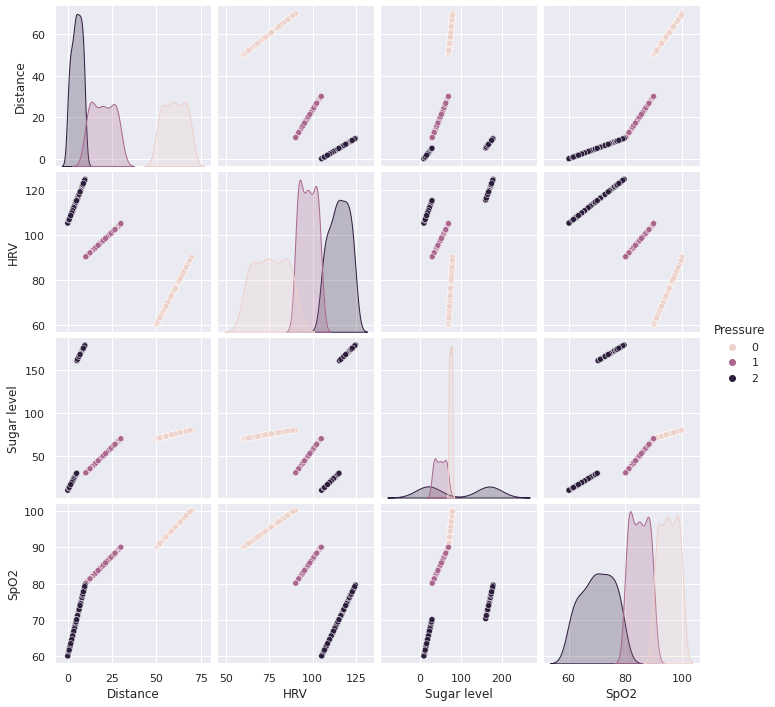

In [77]:
sns.pairplot(df, hue='Pressure')
plt.show()

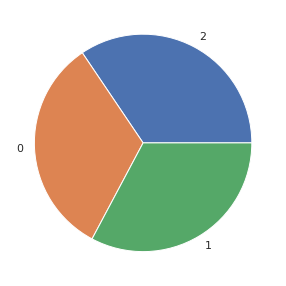

In [78]:
y =df['Pressure']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [79]:
X = df.drop(columns=['Pressure'])
X.head(10)

,Distance,HRV,Sugar level,SpO2
0,68.067,87.412,79.345,99.345
1,69.430,89.480,80.000,99.990
2,57.134,70.824,73.690,93.690
3,66.356,84.816,78.460,98.460
4,60.382,75.752,75.370,95.370
5,63.108,79.888,76.780,96.780
6,58.874,73.464,74.590,94.590
7,64.123,81.428,77.305,97.305
8,66.153,84.508,78.355,98.355
9,63.920,81.120,77.200,97.200


In [80]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,299.0,27.990599,23.884283,0.045,7.1475,19.270,54.1470,69.807
HRV,299.0,96.270642,17.629021,60.088,84.4420,97.502,110.9700,124.590
Sugar level,299.0,73.479666,48.082459,10.177,36.9600,69.960,78.2425,178.526
SpO2,299.0,83.229415,11.162716,60.090,74.2950,84.635,92.1450,99.990


Standardize the Data

In [81]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Distance,HRV,Sugar level,SpO2
0,1.680753,-0.503346,0.122189,1.446118
1,1.737916,-0.385843,0.135835,1.503996
2,1.222237,-1.445872,0.004382,0.938671
3,1.608996,-0.650850,0.103753,1.366703
4,1.358454,-1.165864,0.039380,1.089425
5,1.472779,-0.930858,0.068754,1.215950
6,1.295211,-1.295868,0.023131,1.019432
7,1.515347,-0.843355,0.079691,1.263060
8,1.600483,-0.668350,0.101565,1.357281
9,1.506833,-0.860856,0.077504,1.253638


In [82]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Distance,299.0,4.752794e-17,1.001676,-1.172003,-0.874133,-0.365731,1.096966,1.753727
HRV,299.0,1.425838e-16,1.001676,-2.055888,-0.672100,0.069965,0.835214,1.609099
Sugar level,299.0,-2.376397e-16,1.001676,-1.318751,-0.760795,-0.073323,0.099222,2.188375
SpO2,299.0,-9.030309e-16,1.001676,-2.076395,-0.801722,0.126129,0.800032,1.503996


Observations and Variables

In [83]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker plots

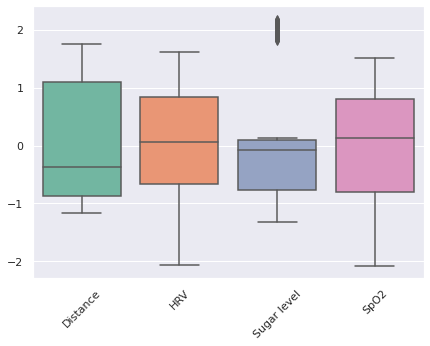

In [84]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

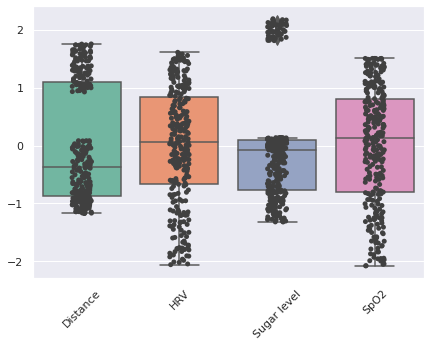

In [85]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

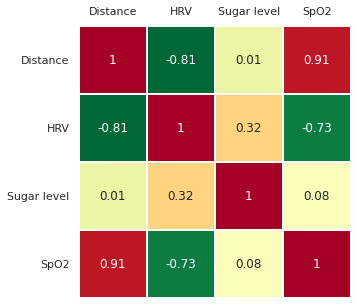

In [86]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# Principal component Analysis

Text(0, 0.5, '$Z_2$')

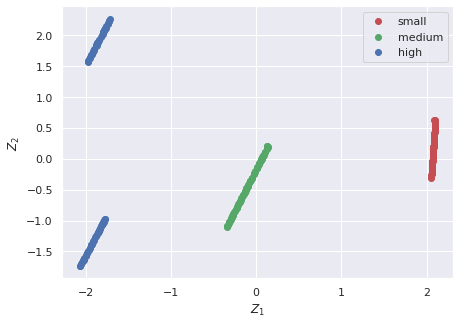

In [87]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(small)->0,  2(medium)->1, 3(high)->2
idx_small = np.where(y == 0)
idx_medium = np.where(y == 1)
idx_high = np.where(y == 2)


plt. figure()
plt.scatter(Z[idx_small,0], Z[idx_small,1], c='r', label='small')
plt.scatter(Z[idx_medium,0], Z[idx_medium,1], c='g', label='medium')
plt.scatter(Z[idx_high,0], Z[idx_high,1], c='b', label='high')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

EigenVectors

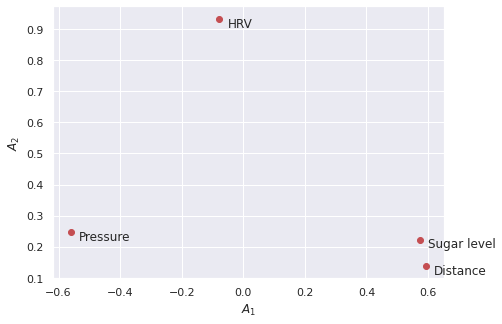

In [88]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(8, 2), textcoords='offset points', ha='left', va='top')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


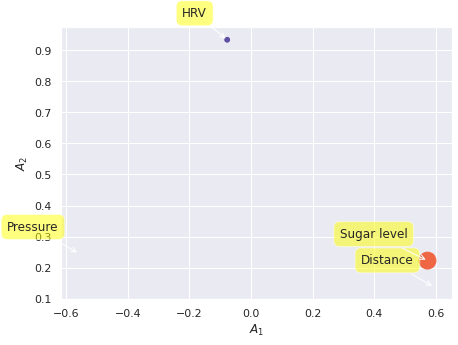

In [89]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree Plot

Text(0, 0.5, 'Explained variance')

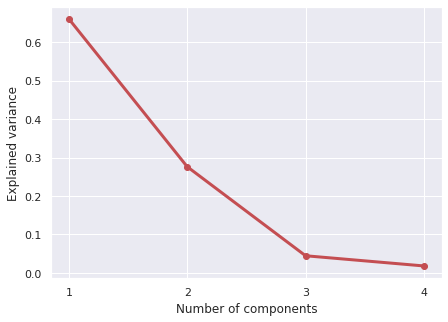

In [90]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

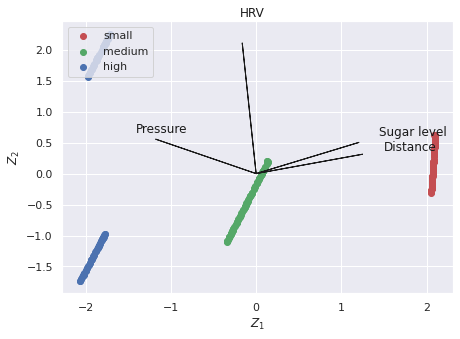

In [91]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.scatter(Z[idx_small,0], Z[idx_small,1], c='r', label='small')
plt.scatter(Z[idx_medium,0], Z[idx_medium,1], c='g', label='medium')
plt.scatter(Z[idx_high,0], Z[idx_high,1], c='b', label='high')

plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')


plt.legend(loc='upper left')


In [92]:
pca.components_

array([[ 0.59352186, -0.55966596, -0.07747002,  0.57315287],
       [ 0.138422  ,  0.24583471,  0.93313917,  0.2228361 ],
       [-0.13536267, -0.75034463,  0.34801828, -0.54547517],
       [-0.78118378, -0.25163911,  0.04618395,  0.56947054]])

In [93]:
pca.components_.T

array([[ 0.59352186,  0.138422  , -0.13536267, -0.78118378],
       [-0.55966596,  0.24583471, -0.75034463, -0.25163911],
       [-0.07747002,  0.93313917,  0.34801828,  0.04618395],
       [ 0.57315287,  0.2228361 , -0.54547517,  0.56947054]])

In [94]:
Lambda = pca.explained_variance_
print('', Lambda)

 [2.65329877 1.1089544  0.17880838 0.07236126]


# Using PCA library

In [95]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


Principal Components

In [97]:
out['PC']

,PC1,PC2,PC3
0,2.098650,0.545180,-0.596126
1,2.098931,0.607610,-0.718854
2,2.072292,0.026998,0.408960
3,2.094525,0.464085,-0.438831
4,2.080123,0.180941,0.110367
...,...,...,...
294,-1.723194,2.225433,-0.128275
295,-2.016304,-1.608402,0.324043
296,-1.775252,-0.982084,-0.344509
297,-1.763948,2.119544,-0.015246


Scatter Plot

[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbee34d64d0>)

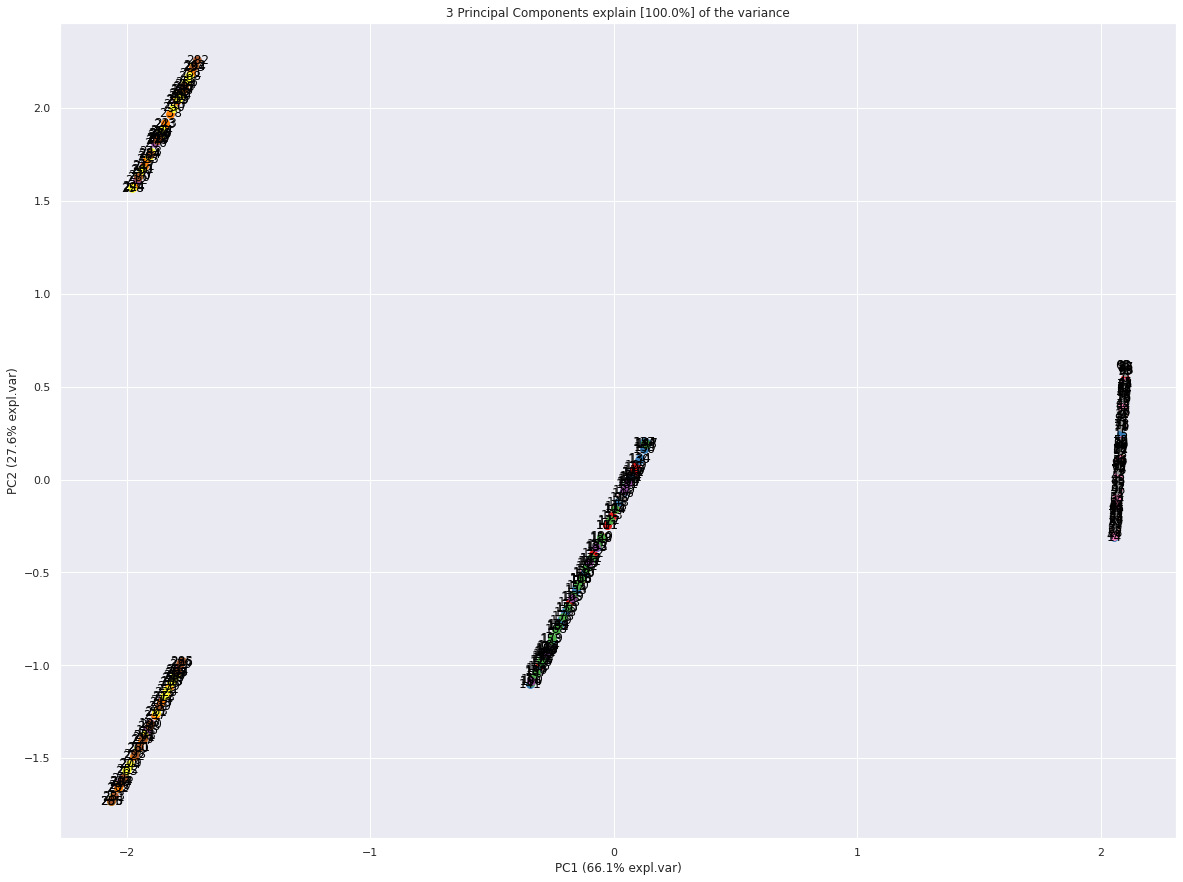

In [98]:
model.scatter(label=True, legend=False)

Eigen Vectors

In [99]:
A = out['loadings'].T

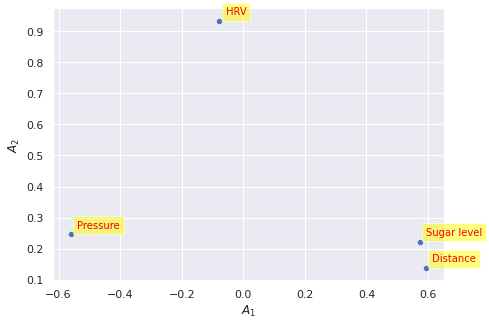

In [100]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

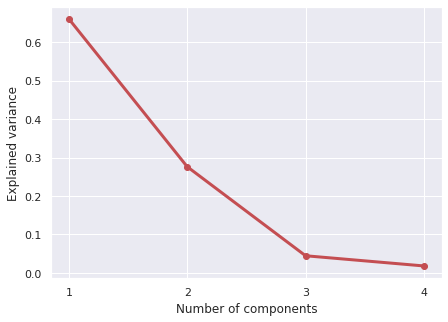

In [101]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

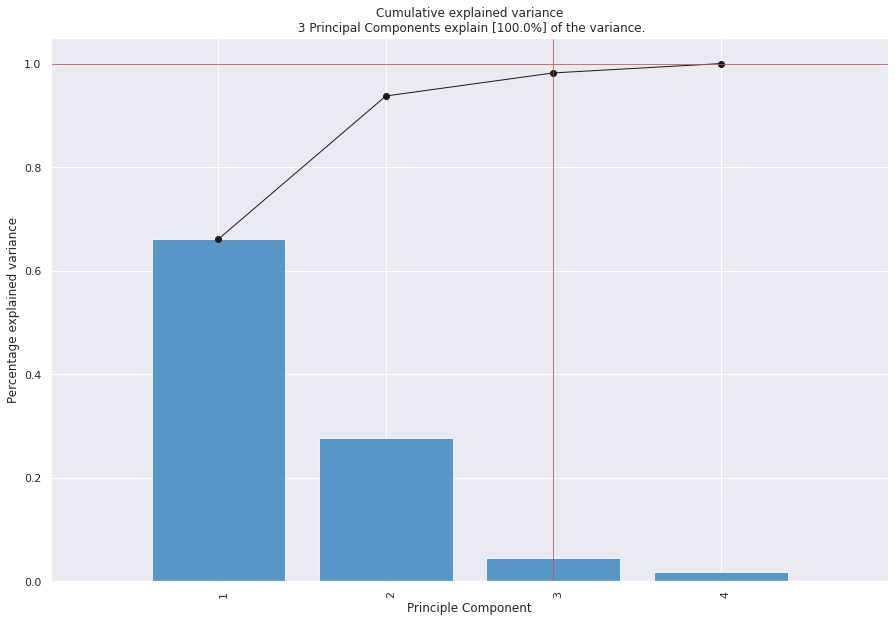

<Figure size 504x360 with 0 Axes>

In [102]:
model.plot();

Biplot

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


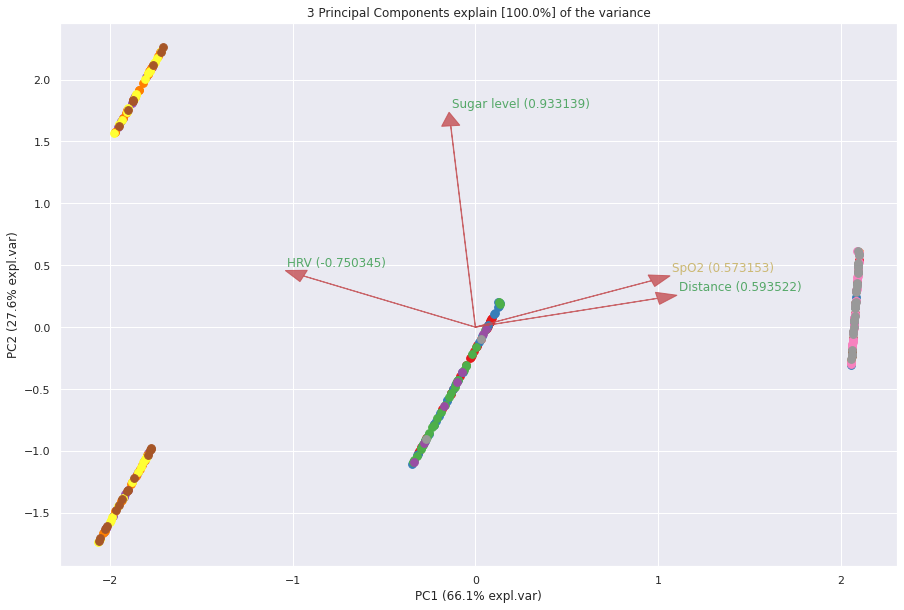

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbee2cda190>)

In [103]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [299] unique colors! Available unique colors: [9].


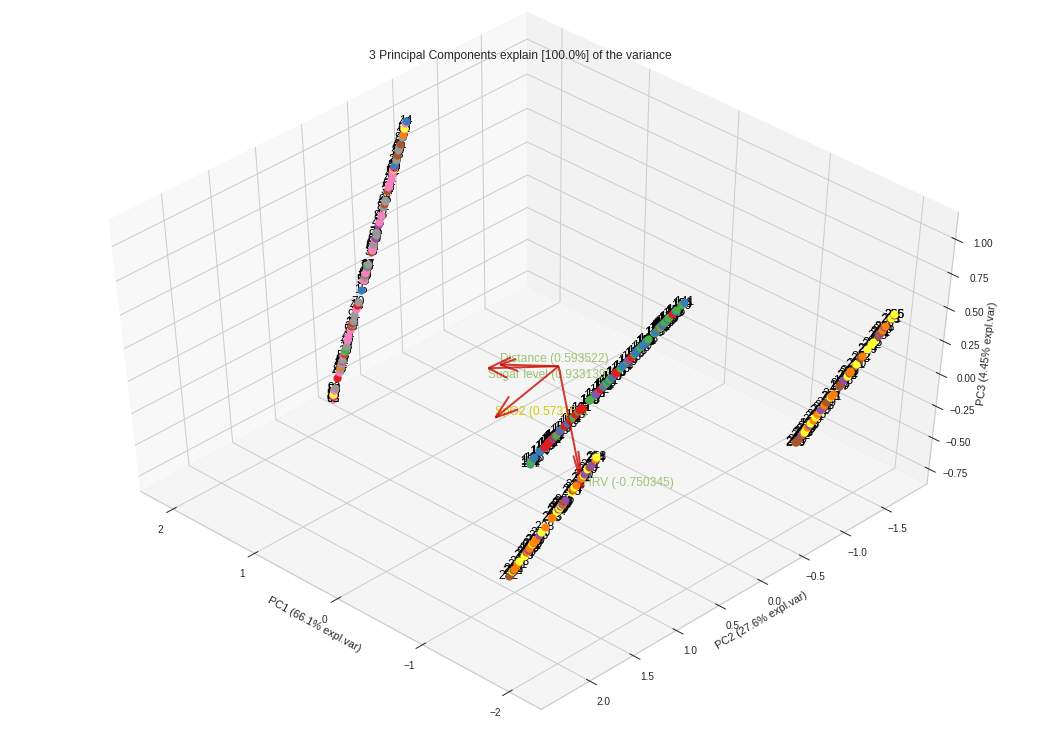

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fbecd2a4e50>)

In [110]:
model.biplot3d(legend=False)